In [139]:
!pip3 install numpy matplotlib scipy seaborn

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

# Task 1

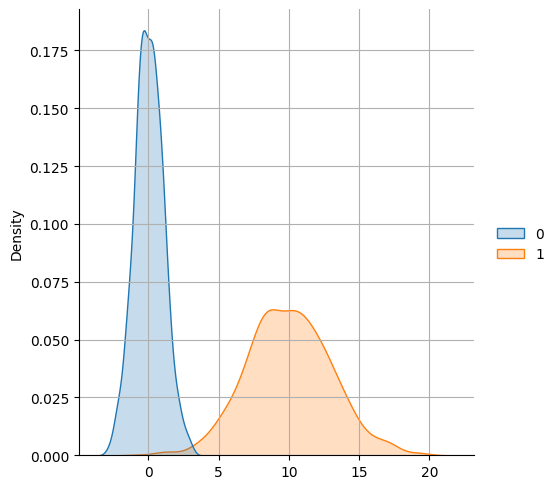

In [141]:
mean1, std1 = 0, 1
mean2, std2 = 10, 3

# Generate 1000 samples from each distribution
samples1 = np.random.normal(mean1, std1, 1000)
samples2 = np.random.normal(mean2, std2, 1000)

sns.displot([samples1, samples2], kind="kde", fill=True)
plt.grid(True)

In [142]:
samples = np.concatenate((samples1, samples2))

# Calculate the mean and standard deviation of the samples
bi_mean = np.mean(samples)
bi_std = np.std(samples)
bi_variance = np.var(samples)

print("Parameters of bimodal distribution:")
print("Mean: ", bi_mean)
print("Standard deviation: ", bi_std)
print("Variance: ", bi_variance)

Parameters of bimodal distribution:
Mean:  5.015044261480895
Standard deviation:  5.46289370489512
Variance:  29.843207630982732


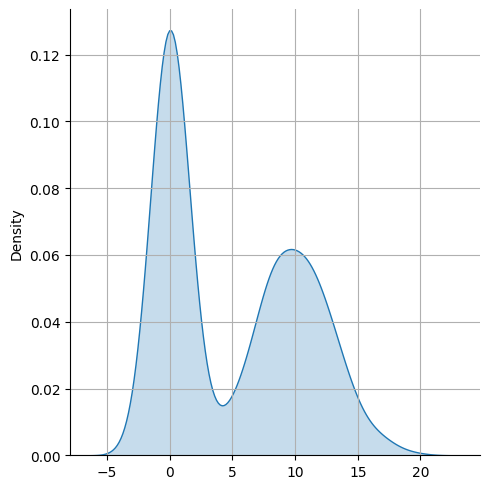

In [143]:
sns.displot(samples, kind="kde", fill=True, label="Bimodal distribution")
plt.grid(True)

Parameters of distribution of means:
Mean:  4.948136729362882
Standard deviation:  0.7070669501334792


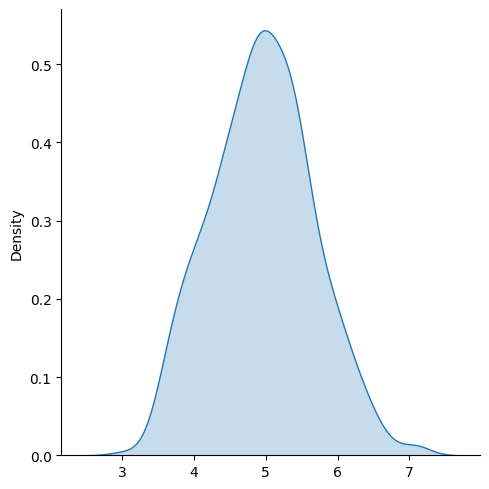

In [144]:
n = 500

samples_to_mean = 60

means = np.zeros(n)

for i in range(n):
    means[i] = np.mean(np.random.choice(samples, samples_to_mean))

sns.displot(means, kind='kde', fill=True, label='Distribution of means')

means_mean = np.mean(means)
means_std = np.std(means)

print("Parameters of distribution of means:")
print("Mean: ", means_mean)
print("Standard deviation: ", means_std)

## Show the main idea of Central limit theorem:

- Means of samples from different distributions are normally distributed.
- The mean of the means of samples from different distributions is equal to the mean of the distribution.
- The standard deviation of the means of samples from different distributions is equal to the standard deviation of the distribution divided by the square root of the number of samples.

In [145]:
print("Standart deviation of the bimodal distribution divided by sqrt(samples): ", bi_std / np.sqrt(samples_to_mean))
print("Standart deviation of the distribution of means: ", means_std)

Standart deviation of the bimodal distribution divided by sqrt(samples):  0.7052565447053378
Standart deviation of the distribution of means:  0.7070669501334792


In [146]:
print("mean of the bimodal distribution: ", bi_mean)
print("mean of the distribution of means: ", means_mean)

mean of the bimodal distribution:  5.015044261480895
mean of the distribution of means:  4.948136729362882


# Task 2

Apply polynomial regression for data analysis

<AxesSubplot: xlabel='x', ylabel='y'>

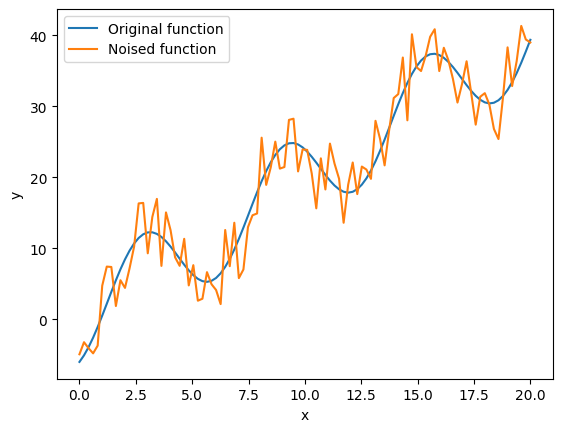

In [147]:
t = np.linspace(0, 20, 100)

# function we would like to fit
y = 2 * t + 2 * np.sin(t) - 6 * np.cos(t)

# add some noise to y
y_noised = y + 3 * np.random.normal(0, 1, 100)

sns.lineplot({'x': t, 'y': y}, x='x', y='y', label='Original function')
sns.lineplot({'x': t, 'y': y_noised}, x='x', y='y', label='Noised function')

In [148]:
# create A and B matrices for linear regression

A = []
B = []

for ti, yi in zip(t, y_noised):
    A.append([ti, np.sin(ti), np.cos(ti)])
    B.append(yi)

A = np.array(A)
B = np.array(B)

params = np.linalg.lstsq(A, B, rcond=None)[0]

# params would be coefficeints for original function
print("Coefficients: ", params)

Coefficients:  [ 2.01574794  2.2991048  -6.02678677]


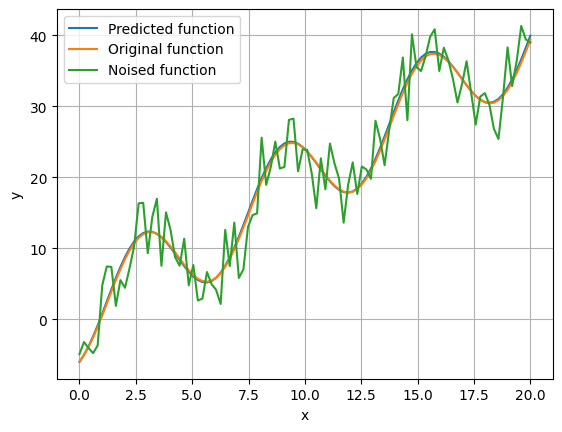

In [149]:
predicted_function = params[0] * t + params[1] * np.sin(t) + params[2] * np.cos(t)

sns.lineplot({'x': t, 'y': predicted_function}, x='x', y='y', label='Predicted function')
sns.lineplot({'x': t, 'y': y}, x='x', y='y', label='Original function')
sns.lineplot({'x': t, 'y': y_noised}, x='x', y='y', label='Noised function')
plt.grid(True)

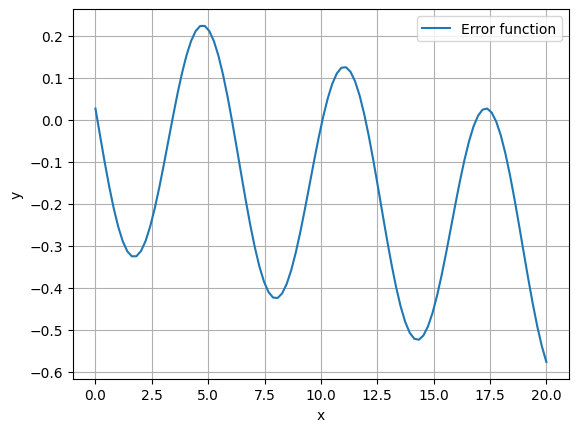

In [150]:
# plot error function
error = y - predicted_function
sns.lineplot({'x': t, 'y': error}, x='x', y='y', label='Error function')
plt.grid(True)

## Conclusion:

- Least squares completed pretty well on dataset with limited size (100 samples only).
- Noise was pretty big and even with that model did good.